In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns

In [16]:
# 데이터 불러오기
file_path = '/content/녹지현황_20240722210253.csv'
greenery_df = pd.read_csv(file_path)

In [17]:
# 첫 두 행 제거 (설명 행 제거)
greenery_df = greenery_df.drop([0, 1])

In [18]:
# 열 이름 재설정
columns = ['지역', '세부지역', '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적',
           '일반녹지_개소수', '일반녹지_면적', '중앙분리대_개소수', '중앙분리대_면적',
           '교통섬_개소수', '교통섬_면적', '화단_개소수', '화단_면적',
           '보도부_개소수', '보도부_면적', '기타녹지_개소수', '기타녹지_면적',
           '지하철환기구_개소수', '지하철환기구_면적', '건물주변_개소수', '건물주변_면적',
           '아파트학교_개소수', '아파트학교_면적', '침수공간_개소수',
           '침수공간_면적', '기타_개소수', '기타_면적']
greenery_df.columns = columns

In [19]:
# '-'를 NaN으로 변환
greenery_df.replace('-', np.nan, inplace=True)

In [20]:
# 데이터 형식 변환 (숫자 데이터로 변환)
for col in columns[2:]:
    greenery_df[col] = greenery_df[col].astype(str).str.replace(',', '').astype(float)

In [21]:
# 데이터 확인
print("가공된 녹지율 데이터 미리보기:")
greenery_df.head()

가공된 녹지율 데이터 미리보기:


,지역,세부지역,총개소수,총면적,시설녹지_개소수,시설녹지_면적,일반녹지_개소수,일반녹지_면적,중앙분리대_개소수,중앙분리대_면적,...,지하철환기구_개소수,지하철환기구_면적,건물주변_개소수,건물주변_면적,아파트학교_개소수,아파트학교_면적,침수공간_개소수,침수공간_면적,기타_개소수,기타_면적
2,서울시,소계,8544.0,16269472.0,957.0,3646905.8,3010.0,5164319.4,243.0,543834.8,...,67.0,16161.0,911.0,476524.3,1424.0,1579049.8,115.0,92193.0,420.0,356907.5
3,서울시,종로구,680.0,228451.0,22.0,53857.0,493.0,109386.0,3.0,2862.0,...,1.0,422.0,28.0,13288.0,25.0,17469.0,6.0,5442.0,39.0,3801.0
4,서울시,중구,387.0,222277.0,26.0,31626.0,102.0,45510.0,8.0,7973.0,...,5.0,566.0,96.0,77963.0,34.0,32525.0,1.0,3000.0,2.0,902.0
5,서울시,용산구,346.0,354568.0,21.0,56937.0,78.0,78396.0,45.0,20375.0,...,6.0,224.0,40.0,28980.0,31.0,46079.0,6.0,724.0,72.0,6052.0
6,서울시,성동구,413.0,311512.2,14.0,36135.2,248.0,95359.0,21.0,9305.0,...,2.0,1400.0,34.0,12119.0,42.0,42235.0,4.0,974.0,3.0,1913.0


In [22]:
# 결측값 확인
print("\n가공된 데이터 결측값 확인:")
greenery_df.isnull().sum()


가공된 데이터 결측값 확인:


지역             0
세부지역           0
총개소수           0
총면적            0
시설녹지_개소수       2
시설녹지_면적        2
일반녹지_개소수       0
일반녹지_면적        0
중앙분리대_개소수      4
중앙분리대_면적       4
교통섬_개소수        5
교통섬_면적         5
화단_개소수         6
화단_면적          6
보도부_개소수        5
보도부_면적         5
기타녹지_개소수       1
기타녹지_면적        1
지하철환기구_개소수    10
지하철환기구_면적     10
건물주변_개소수       2
건물주변_면적        2
아파트학교_개소수      2
아파트학교_면적       2
침수공간_개소수       3
침수공간_면적        3
기타_개소수         3
기타_면적          3
dtype: int64

In [23]:
# 기초 통계량 확인
print("\n가공된 데이터 통계 요약:")
greenery_df.describe()


가공된 데이터 통계 요약:


,총개소수,총면적,시설녹지_개소수,시설녹지_면적,일반녹지_개소수,일반녹지_면적,중앙분리대_개소수,중앙분리대_면적,교통섬_개소수,교통섬_면적,...,지하철환기구_개소수,지하철환기구_면적,건물주변_개소수,건물주변_면적,아파트학교_개소수,아파트학교_면적,침수공간_개소수,침수공간_면적,기타_개소수,기타_면적
count,28.000000,2.800000e+01,26.000000,2.600000e+01,28.000000,2.800000e+01,24.000000,24.000000,23.000000,23.000000,...,18.000000,18.000000,26.000000,26.000000,26.000000,2.600000e+01,25.000000,25.000000,25.000000,25.000000
mean,610.285714,1.162105e+06,73.615385,2.805312e+05,215.000000,3.688800e+05,20.250000,45319.566667,10.000000,10412.956522,...,7.444444,1795.666667,70.076923,36655.715385,109.538462,1.214654e+05,9.200000,7375.440000,33.600000,28552.600000
std,1559.980148,2.998524e+06,182.293187,7.095624e+05,555.063026,9.826161e+05,48.681083,111862.553368,23.063154,24376.107401,...,15.170491,3702.493707,172.309471,90941.044851,269.097340,2.990593e+05,22.343903,18248.283545,82.893003,71860.678201
min,3.000000,5.018600e+04,7.000000,7.316000e+03,2.000000,1.306900e+04,1.000000,1000.000000,1.000000,74.000000,...,1.000000,50.000000,18.000000,5241.700000,25.000000,1.746900e+04,1.000000,100.000000,1.000000,75.000000
25%,253.250000,2.788641e+05,15.750000,3.766290e+04,66.500000,6.460755e+04,4.000000,7572.750000,3.500000,2136.500000,...,1.000000,363.500000,27.000000,11483.500000,39.750000,4.627300e+04,1.000000,954.000000,4.000000,902.000000
50%,323.500000,4.213600e+05,33.500000,1.130285e+05,91.000000,8.957600e+04,6.000000,15986.000000,6.000000,4454.000000,...,4.000000,529.000000,32.500000,14627.000000,55.500000,5.414450e+04,5.000000,1975.000000,7.000000,5647.000000
75%,413.000000,8.242166e+05,54.750000,1.702630e+05,129.500000,2.005452e+05,18.000000,25428.000000,7.000000,7792.000000,...,6.750000,1472.750000,44.000000,21560.250000,69.500000,8.499223e+04,6.000000,5464.000000,28.000000,20831.500000
max,8544.000000,1.626947e+07,957.000000,3.646906e+06,3010.000000,5.164319e+06,243.000000,543834.800000,115.000000,119749.000000,...,67.000000,16161.000000,911.000000,476524.300000,1424.000000,1.579050e+06,115.000000,92193.000000,420.000000,356907.500000


In [24]:
# 녹지 면적 컬럼 리스트
greenery_columns = [
    '시설녹지_면적', '일반녹지_면적', '기타녹지_면적'
]

# 각 구의 녹지율 계산 (총면적에서 각 녹지 면적의 합을 백분율로 표현)
greenery_df['녹지율'] = greenery_df[greenery_columns].sum(axis=1) / greenery_df['총면적'] * 100

# 결과 확인
print("녹지율이 추가된 데이터 미리보기:")
print(greenery_df[['지역', '세부지역', '총면적', '녹지율']].head())

녹지율이 추가된 데이터 미리보기:
    지역 세부지역         총면적        녹지율
2  서울시   소계  16269472.0  57.982383
3  서울시  종로구    228451.0  78.352907
4  서울시   중구    222277.0  44.662291
5  서울시  용산구    354568.0  43.303964
6  서울시  성동구    311512.2  49.230560


In [25]:
# 변경된 컬럼확인
greenery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 2 to 29
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역          28 non-null     object 
 1   세부지역        28 non-null     object 
 2   총개소수        28 non-null     float64
 3   총면적         28 non-null     float64
 4   시설녹지_개소수    26 non-null     float64
 5   시설녹지_면적     26 non-null     float64
 6   일반녹지_개소수    28 non-null     float64
 7   일반녹지_면적     28 non-null     float64
 8   중앙분리대_개소수   24 non-null     float64
 9   중앙분리대_면적    24 non-null     float64
 10  교통섬_개소수     23 non-null     float64
 11  교통섬_면적      23 non-null     float64
 12  화단_개소수      22 non-null     float64
 13  화단_면적       22 non-null     float64
 14  보도부_개소수     23 non-null     float64
 15  보도부_면적      23 non-null     float64
 16  기타녹지_개소수    27 non-null     float64
 17  기타녹지_면적     27 non-null     float64
 18  지하철환기구_개소수  18 non-null     float64
 19  지하철환기구_면적   18 non-null     flo

In [26]:
# 추가 기초통계량
greenery_df.describe()

,총개소수,총면적,시설녹지_개소수,시설녹지_면적,일반녹지_개소수,일반녹지_면적,중앙분리대_개소수,중앙분리대_면적,교통섬_개소수,교통섬_면적,...,지하철환기구_면적,건물주변_개소수,건물주변_면적,아파트학교_개소수,아파트학교_면적,침수공간_개소수,침수공간_면적,기타_개소수,기타_면적,녹지율
count,28.000000,2.800000e+01,26.000000,2.600000e+01,28.000000,2.800000e+01,24.000000,24.000000,23.000000,23.000000,...,18.000000,26.000000,26.000000,26.000000,2.600000e+01,25.000000,25.000000,25.000000,25.000000,28.000000
mean,610.285714,1.162105e+06,73.615385,2.805312e+05,215.000000,3.688800e+05,20.250000,45319.566667,10.000000,10412.956522,...,1795.666667,70.076923,36655.715385,109.538462,1.214654e+05,9.200000,7375.440000,33.600000,28552.600000,53.633516
std,1559.980148,2.998524e+06,182.293187,7.095624e+05,555.063026,9.826161e+05,48.681083,111862.553368,23.063154,24376.107401,...,3702.493707,172.309471,90941.044851,269.097340,2.990593e+05,22.343903,18248.283545,82.893003,71860.678201,17.186623
min,3.000000,5.018600e+04,7.000000,7.316000e+03,2.000000,1.306900e+04,1.000000,1000.000000,1.000000,74.000000,...,50.000000,18.000000,5241.700000,25.000000,1.746900e+04,1.000000,100.000000,1.000000,75.000000,26.041127
25%,253.250000,2.788641e+05,15.750000,3.766290e+04,66.500000,6.460755e+04,4.000000,7572.750000,3.500000,2136.500000,...,363.500000,27.000000,11483.500000,39.750000,4.627300e+04,1.000000,954.000000,4.000000,902.000000,44.322709
50%,323.500000,4.213600e+05,33.500000,1.130285e+05,91.000000,8.957600e+04,6.000000,15986.000000,6.000000,4454.000000,...,529.000000,32.500000,14627.000000,55.500000,5.414450e+04,5.000000,1975.000000,7.000000,5647.000000,49.268131
75%,413.000000,8.242166e+05,54.750000,1.702630e+05,129.500000,2.005452e+05,18.000000,25428.000000,7.000000,7792.000000,...,1472.750000,44.000000,21560.250000,69.500000,8.499223e+04,6.000000,5464.000000,28.000000,20831.500000,62.662549
max,8544.000000,1.626947e+07,957.000000,3.646906e+06,3010.000000,5.164319e+06,243.000000,543834.800000,115.000000,119749.000000,...,16161.000000,911.000000,476524.300000,1424.000000,1.579050e+06,115.000000,92193.000000,420.000000,356907.500000,89.523628


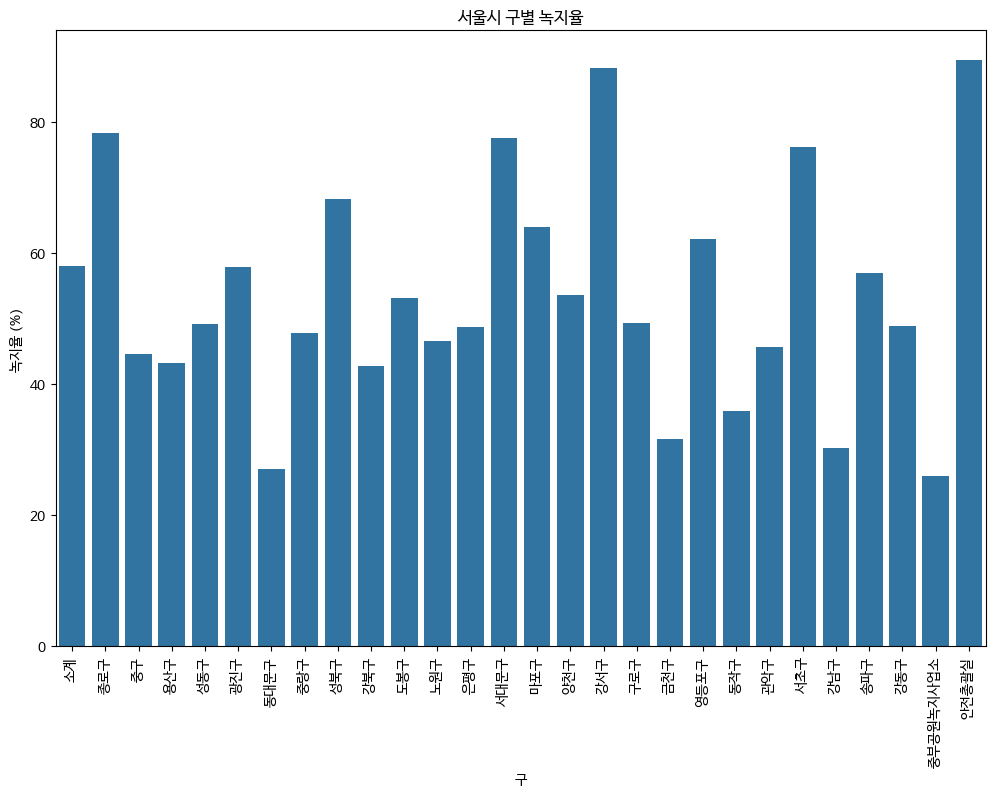

In [27]:
# 구별 녹지율 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='세부지역', y='녹지율', data=greenery_df)
plt.rc('font', family='NanumBarunGothic')  # 폰트 설정
plt.xticks(rotation=90)
plt.xlabel('구')
plt.ylabel('녹지율 (%)')
plt.title('서울시 구별 녹지율')
plt.show()